In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy="most_frequent")
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000
)


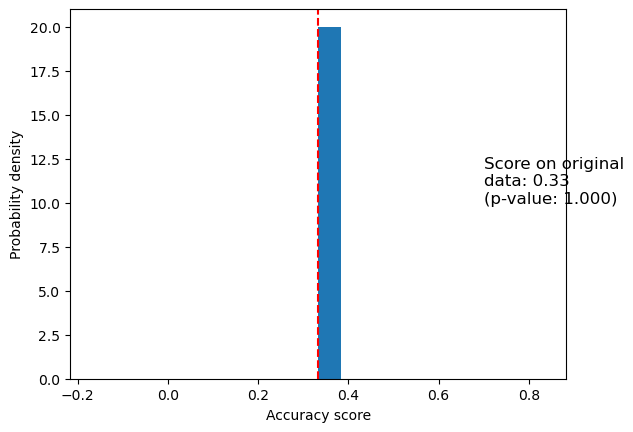

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls="--", color="r")
score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

In [5]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier()

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000
)


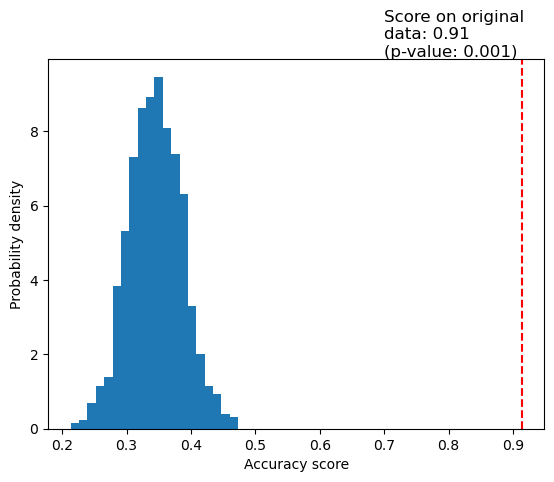

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls="--", color="r")
score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

- on the existance of a significant statistical association between the iris type and the input features
   If there was no significant statistical association between the iris type and the input features, then all classifiers would have a high p-value because the permutation always destroys any feature label dependency present. The HistGradientBoostingClassifier has low p-value and thus able to utilize the association present 
- on the ability of each kind of estimator to assess or not such a statistical association between features and target variable
  - The DummyClassifier has high p-value because it was not able to capture the statistical association present and not because there is not structure present in the data as the permutation destroys any feature label dependency present